In [1]:
from typing import TypedDict

class SimpleState(TypedDict):
    message: str
    user_input: str

In [ ]:
from langgraph.types import interrupt


def  greeting_node(state: SimpleState) -> SimpleState:
    print("inside greeting_node ")

    return {}

def  greeting_node2(state: SimpleState) -> SimpleState:
    #
    #
    #
    #
    user_name= interrupt("What is your name?")

    print("resumed with user_name:", user_name)

    return {
        "message": f"Hello, {user_name}!",
        "user_input": user_name
    }
   

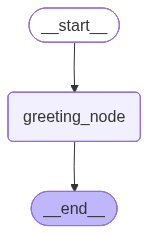

In [6]:
from langgraph.graph import StateGraph, END, START
from langgraph.checkpoint.memory import MemorySaver

workflow = StateGraph(SimpleState)

workflow.add_node("greeting_node",greeting_node)
workflow.set_entry_point("greeting_node")
workflow.set_finish_point("greeting_node")

graph=workflow.compile( checkpointer=MemorySaver() )
graph

In [7]:
config = {"configurable": {"thread_id": "thread-1"}}

result= graph.invoke({},config=config)
result

inside greeting_node 


{'__interrupt__': [Interrupt(value='What is your name?', id='880f30473edff9f1096935c609b004c0')]}

In [8]:
result["__interrupt__"][0].value

'What is your name?'

In [9]:
from langgraph.types import Command

result=graph.invoke(Command(resume="SivaPrasad"),config=config)
result

inside greeting_node 
resumed with user_name: SivaPrasad


{'message': 'Hello, SivaPrasad!', 'user_input': 'SivaPrasad'}